## Business Insight 

### Problem Statement

Problem : Bagaimana meningkatkan customer satisfaction? 

Business Metrics :

1. Customer Care Calls
2. Customer Rating

### EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Train.csv')

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
nums=df.select_dtypes(np.number)

In [5]:
nums.sample(10)

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
6887,6888,5,3,243,5,2,1776,1
5217,5218,6,4,275,4,9,1585,0
9923,9924,5,4,263,5,8,1548,0
6487,6488,4,3,242,2,3,4811,1
7996,7997,5,3,262,5,8,1493,1
4532,4533,4,5,140,3,7,5383,0
4985,4986,6,1,152,2,3,1340,0
9970,9971,5,5,163,2,6,5253,1
6108,6109,2,5,189,2,9,5245,0
2983,2984,4,3,222,4,49,3697,1


In [6]:
plt.style.use('ggplot')

#### Distribusi Target Column

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64


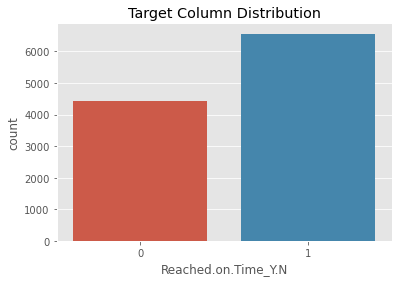

In [7]:
sns.countplot(nums['Reached.on.Time_Y.N'])
print(nums['Reached.on.Time_Y.N'].value_counts())
plt.title('Target Column Distribution')
plt.savefig('target.png')

Distribusi class untuk target column sudah cukup balance.

#### Cek Hubungan kolom-kolom numerik dengan Target Column

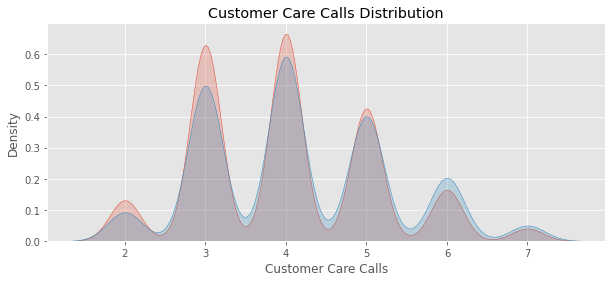

In [8]:
plt.figure(figsize=(10,4))
sns.kdeplot(nums[nums['Reached.on.Time_Y.N']==1]['Customer_care_calls'], label='arrived_late', shade=True)
sns.kdeplot(nums[nums['Reached.on.Time_Y.N']==0]['Customer_care_calls'], label='on_time', shade=True)
plt.xlabel('Customer Care Calls')
plt.ylabel('Density')
plt.title('Customer Care Calls Distribution')
plt.savefig('cc dist.png')

Keterlambatan pengiriman tidak mempengaruhi jumlah telepon dari customer yang menanyakan pengiriman.

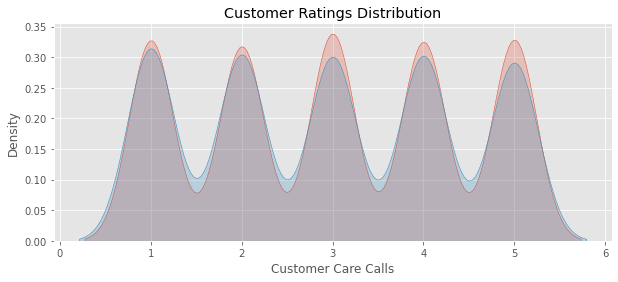

In [9]:
plt.figure(figsize=(10,4))
sns.kdeplot(nums[nums['Reached.on.Time_Y.N']==1]['Customer_rating'], label='arrived_late', shade=True)
sns.kdeplot(nums[nums['Reached.on.Time_Y.N']==0]['Customer_rating'], label='on_time', shade=True)
plt.xlabel('Customer Care Calls')
plt.ylabel('Density')
plt.title('Customer Ratings Distribution')
plt.savefig('crat.png')

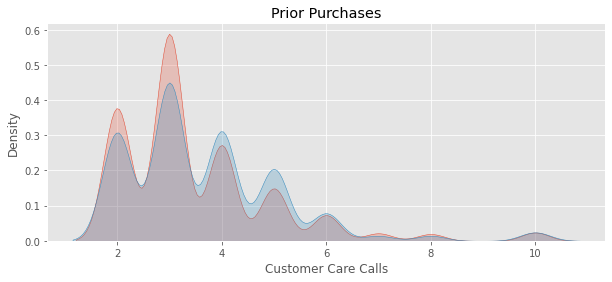

In [10]:
plt.figure(figsize=(10,4))
sns.kdeplot(nums[nums['Reached.on.Time_Y.N']==1]['Prior_purchases'], label='arrived_late', shade=True)
sns.kdeplot(nums[nums['Reached.on.Time_Y.N']==0]['Prior_purchases'], label='on_time', shade=True)
plt.xlabel('Customer Care Calls')
plt.ylabel('Density')
plt.title('Prior Purchases')
plt.savefig('pp.png')

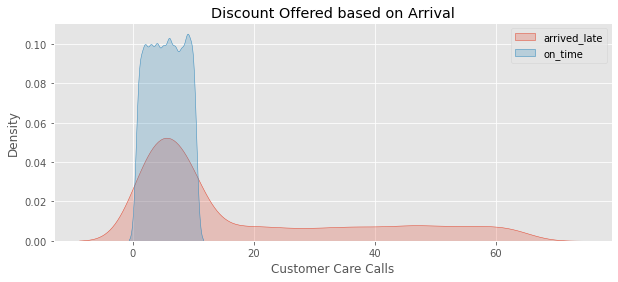

In [11]:
plt.figure(figsize=(10,4))
sns.kdeplot(nums[nums['Reached.on.Time_Y.N']==1]['Discount_offered'], label='arrived_late', shade=True)
sns.kdeplot(nums[nums['Reached.on.Time_Y.N']==0]['Discount_offered'], label='on_time', shade=True)
plt.xlabel('Customer Care Calls')
plt.ylabel('Density')
plt.title('Discount Offered based on Arrival')
plt.legend()
plt.savefig('disc.png')

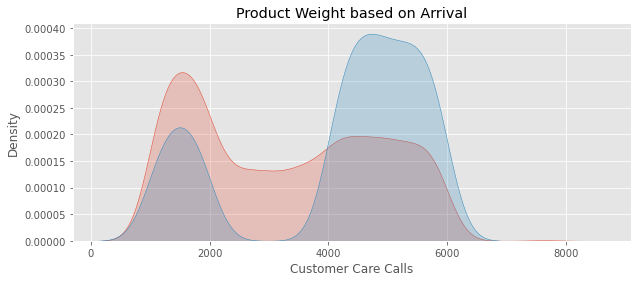

In [12]:
plt.figure(figsize=(10,4))
sns.kdeplot(nums[nums['Reached.on.Time_Y.N']==1]['Weight_in_gms'], label='arrived_late', shade=True)
sns.kdeplot(nums[nums['Reached.on.Time_Y.N']==0]['Weight_in_gms'], label='on_time', shade=True)
plt.xlabel('Customer Care Calls')
plt.ylabel('Density')
plt.title('Product Weight based on Arrival')
plt.savefig('weight.png')

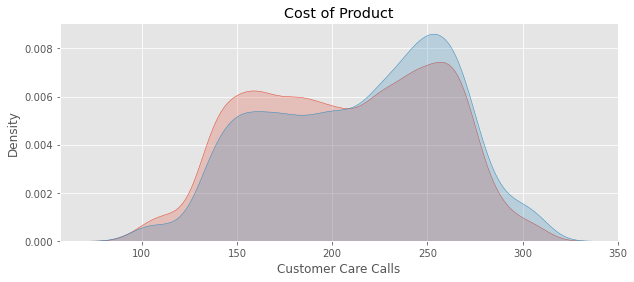

In [13]:
plt.figure(figsize=(10,4))
sns.kdeplot(nums[nums['Reached.on.Time_Y.N']==1]['Cost_of_the_Product'], label='arrived_late', shade=True)
sns.kdeplot(nums[nums['Reached.on.Time_Y.N']==0]['Cost_of_the_Product'], label='on_time', shade=True)
plt.xlabel('Customer Care Calls')
plt.ylabel('Density')
plt.title('Cost of Product')
plt.savefig('cost.png')

Dari beberapa plot tersebut, dapat dilihat:
1. Ketepatan waktu pengiriman tidak terlalu berdampak pada kolom-kolom Customer rating, Customer care calls, dan Prior Purchases.
2. Pada produk yang memiliki diskon lebih tinggi ada kecenderungan terjadi keterlambatan dalam pengiriman.
3. Produk yang lebih berat cenderung sampai tepat waktu ketimbang yang lebih ringan.
4. Harga produk tidak terlalu berpengaruh signifikan terhadap ketepatan pengiriman.

Maka, dalam konteks ketepatan pengiriman kita memiliki 2 faktor yang berpotensi mengalami keterlambatan terbesar: <b>diskon</b> dan <b>berat produk</b>.

Kita dapat melihat trend hubungan diskon dan berat produk pada grafik berikut.

Text(0.5, 1.0, 'Discount vs Product Weight')

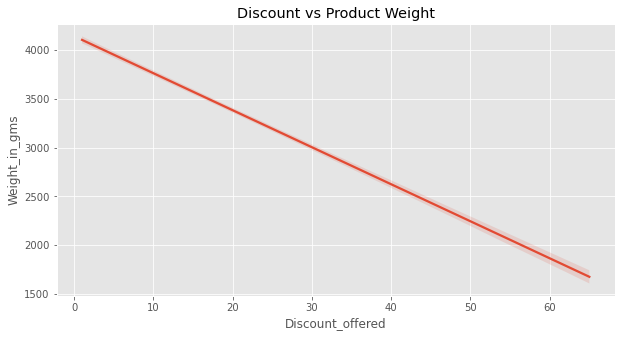

In [14]:
plt.figure(figsize=(10,5))
sns.regplot(y='Weight_in_gms',x='Discount_offered',data=nums, scatter=False)
plt.title('Discount vs Product Weight')

Dapat dilihat bahwa semakin berat produk maka trend nilai diskonnya semakin kecil (berbanding terbalik). Hal ini sesuai dengan insight awal di mana produk yang berat dan produk dengan diskon yang kecil lebih cenderung untuk sampai tepat waktu.

Dengan begitu, dapat dievaluasi dalam handling pengiriman barang-barang yang memiliki nilai diskon yang tinggi atau yang beratnya kecil. Apakah ada perbedaan handling dalam pengiriman antara produk-produk tersebut? Apa yang menyebabkan kelompok-kelompok tersebut cenderung terlambat sampai pada customer?

### Kaitan dengan Problem Statement

Untuk meningkatkan nilai kepuasan pelanggan, metrics awal yang digunakan adalah customer_care_calls dan customer_rating.
Penjelasan kolom dari kaggle:

1. Customer_care_calls : jumlah telepon yang menanyakan tentang pengiriman produk.
2. Customer_rating : rating pelanggan terhadap perusahaan.

Seperti yang dapat kita lihat di atas, baik keduanya tidak terlalu dipengaruhi oleh target column.

Jika dilihat korelasinya menggunakan heatmap:

<AxesSubplot:>

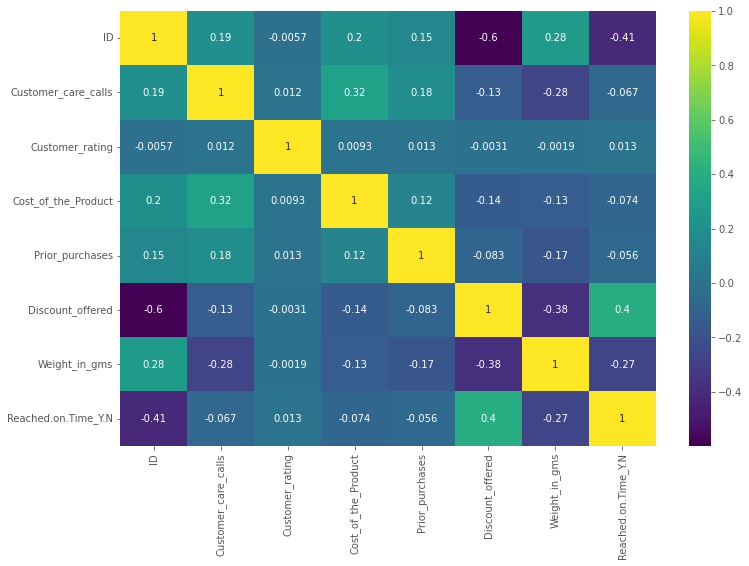

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(nums.corr(),cmap='viridis', annot=True)

Kolom customer rating memiliki korelasi yang sangat rendah dengan kolom-kolom lainnya. Sedangkan untuk kolom customer care calls, memiliki korelasi yang cukup dengan beberapa kolom lain.

#### Hubungan Customer Care Calls dengan Beberapa kolom lain

Text(0.5, 0.98, 'Customer Care Calls vs Cost of the Product')

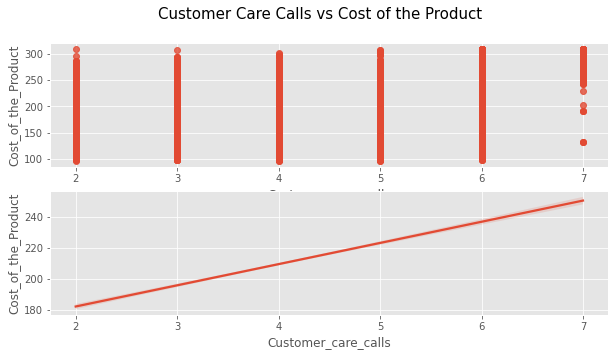

In [16]:
fig, axs=plt.subplots(2,1, figsize=(10,5))
sns.regplot(y='Cost_of_the_Product',x='Customer_care_calls',data=nums, fit_reg=False, ax=axs[0])

sns.regplot(y='Cost_of_the_Product',x='Customer_care_calls',data=nums, scatter=False, ax=axs[1])

fig.suptitle('Customer Care Calls vs Cost of the Product', fontsize=15)

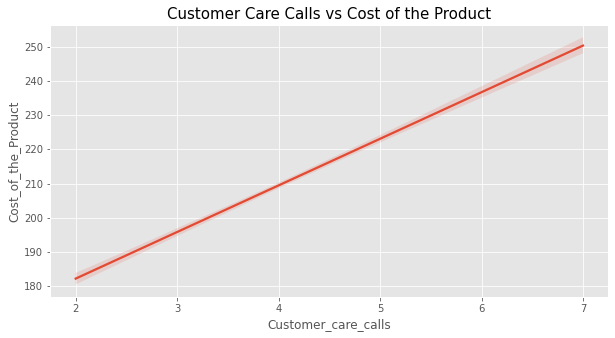

In [17]:
plt.figure(figsize=(10,5))
sns.regplot(y='Cost_of_the_Product',x='Customer_care_calls',data=nums, scatter=False)
plt.title('Customer Care Calls vs Cost of the Product', fontsize=15)
plt.savefig('cc vs cost.png')

<b>Jumlah telepon</b> dari customer yang menanyakan pengiriman cenderung <b>lebih banyak</b> ketika harga produk yang dibeli <b>lebih mahal</b>.

Text(0.5, 1.0, 'Customer Care Calls vs Discount Offered')

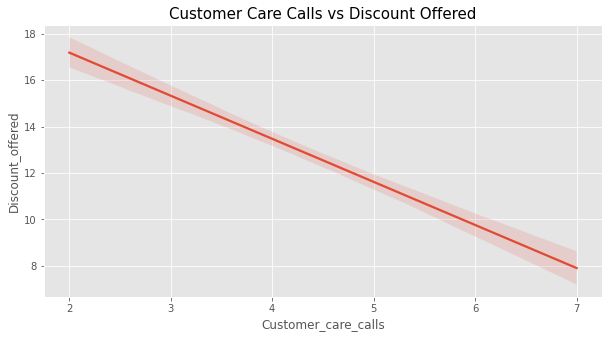

In [18]:
# fig, axs=plt.subplots(2,1, figsize=(10,5))
# sns.regplot(y='Discount_offered',x='Customer_care_calls',data=nums, fit_reg=False, ax=axs[0])
plt.figure(figsize=(10,5))
sns.regplot(y='Discount_offered',x='Customer_care_calls',data=nums, scatter=False)
plt.savefig('cc vs disc.png')
plt.title('Customer Care Calls vs Discount Offered', fontsize=15)

<b>Jumlah telepon</b> dari customer yang menanyakan pengiriman cenderung <b>lebih banyak</b> ketika <b>diskon </b> yang ditawarkan pada produk <b>lebih kecil</b>.

Text(0.5, 1.0, 'Customer Care Calls vs Product Weight')

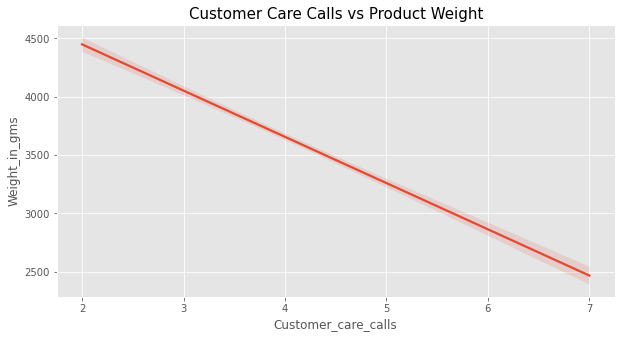

In [19]:
# fig, axs=plt.subplots(2,1, figsize=(10,5))
# sns.regplot(y='Weight_in_gms',x='Customer_care_calls',data=nums, ax=axs[0])

plt.figure(figsize=(10,5))
sns.regplot(y='Weight_in_gms',x='Customer_care_calls',data=nums, scatter=False)
plt.savefig('cc vs prod_weight.png')
plt.title('Customer Care Calls vs Product Weight', fontsize=15)

<b>Jumlah telepon</b> dari customer yang menanyakan pengiriman cenderung <b>lebih banyak</b> ketika <b>berat produk</b> lebih kecil</b>.

### Kesimpulan

1. Untuk produk dengan nilai diskon yang tinggi > pengiriman lebih cenderung terlambat dan customer care calls lebih sedikit, vice versa.
2. Untuk produk dengan berat produk yang rendah > pengiriman cenderung terlambat dan customer care calls lebih banyak, vice versa.
3. Produk yang harganya lebih mahal cenderung memiliki jumlah customer care calls yang tinggi.

Kemungkinan faktor yang mempengaruhi keterlambatan:
- diskon
- berat produk

Faktor yang berperan dalam kepuasan customer (dilihat dari customer_care_calls):
- diskon
- berat produk
- harga produk

Kemungkinan yang terjadi: adanya treatment yang berbeda pada shipping produk berdasarkan berat/nilai diskonnya.

Model machine learning yang dibuat nantinya akan dapat <b> memprediksi apakah suatu produk akan sampai tepat waktu atau tidak</b>. Maka dari itu, ketika model tersebut sudah di deploy, jumlah <b> customer_care_calls akan berkurang</b>.

Saran : Customer rating dihapus dari metrics.